# Imports

In [1]:
import pandas as pd
import networkx as nx
import datetime
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set_theme()
import os
import pickle
from tqdm import tqdm
import analysis_util
import nltk 

In [8]:
nltk.download(["names", "stopwords", "state_union", "twitter_samples", "movie_reviews", "averaged_perceptron_tagger", "vader_lexicon", "punkt"])

[nltk_data] Downloading package names to /home/pelle/nltk_data...
[nltk_data]   Unzipping corpora/names.zip.
[nltk_data] Downloading package stopwords to /home/pelle/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package state_union to
[nltk_data]     /home/pelle/nltk_data...
[nltk_data]   Unzipping corpora/state_union.zip.
[nltk_data] Downloading package twitter_samples to
[nltk_data]     /home/pelle/nltk_data...
[nltk_data]   Unzipping corpora/twitter_samples.zip.
[nltk_data] Downloading package movie_reviews to
[nltk_data]     /home/pelle/nltk_data...
[nltk_data]   Unzipping corpora/movie_reviews.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/pelle/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/pelle/nltk_data...
[nltk_data] Downloading package punkt to /home/pelle/nltk_data...
[nltk_data]   Packag

True

# Data

In [2]:
subreddits = ['FourSentenceStories','Trump666','GraphTheory','jazznoir','indoorbouldering','kiwi_bird']
period = '2015-01-01-2022-01-01'

df_post_dict = {}
df_comment_dict = {}
df_all_nodes_dict = {}
G_dict = {}
G_di_dict = {}
df_authors_dict = {}


for subreddit in subreddits:
    path_post='../data/raw/'+ subreddit +'_'+  period +'/'+ subreddit + "_posts.csv"
    path_comment = '../data/raw/'+ subreddit +'_'+  period +'/'+ subreddit + "_comments.csv"
    
    df_comments=analysis_util.read_comments(path_comment)
    df_post=analysis_util.read_posts(path_post)
    df_all_nodes=analysis_util.get_all_nodes(df_post,df_comments)
    
    G_di = analysis_util.get_DiGraph(df_post,df_comments,df_all_nodes)
    G=analysis_util.get_graph(df_post,df_comments,df_all_nodes)
    G_big=analysis_util.get_biggest_component(G)
    
    df_comment_post = analysis_util.get_comment_post_date(df_comments,df_post)
    df_authors = analysis_util.get_authors(G,df_all_nodes,df_comments,df_post,df_comment_post)

    df_comment_dict[subreddit] = df_comments
    df_post_dict[subreddit] = df_post
    df_all_nodes_dict[subreddit] = df_all_nodes
    G_dict[subreddit] = G_big
    df_authors_dict[subreddit] = df_authors
    G_di_dict[subreddit] = G_di

Removed 0.008264462809917328 of the rows
Removed 0.023008849557522026 of the rows
Removed 0.046391752577319645 of the rows
Removed 0.056192660550458795 of the rows
Removed 0.013580246913580174 of the rows
Removed 0.01412429378531077 of the rows


In [26]:
for subreddit in subreddits:
    if 'text' in df_comment_dict[subreddit].columns:
        # rename text column name
        df_comment_dict[subreddit] = df_comment_dict[subreddit].rename(columns={'text':'body'})

In [20]:
df_post_dict['FourSentenceStories'].head()

,author,date,domain,id,n_comments,score,text,title,url,date_n
0,SkyFallingUp,2021-05-04 19:46:51,self.FourSentenceStories,n4wasd,0,1,The wolves scratched at the door.\n\nThe smell...,It.,https://www.reddit.com/r/FourSentenceStories/c...,1.620150e+09
1,SkyFallingUp,2021-05-04 18:56:37,self.FourSentenceStories,n4v185,0,1,"He loved me, I know he did. But he also loved ...",Me...her.,https://www.reddit.com/r/FourSentenceStories/c...,1.620147e+09
2,SkyFallingUp,2021-05-04 17:42:48,self.FourSentenceStories,n4ugas,0,1,The office lights flickered which broke my wri...,The Office.,https://www.reddit.com/r/FourSentenceStories/c...,1.620143e+09
3,SkyFallingUp,2021-05-04 16:57:27,self.FourSentenceStories,n4tc5b,0,1,"""Why not?"" I asked my brother, holding the fla...",Buried.,https://www.reddit.com/r/FourSentenceStories/c...,1.620140e+09
4,SkyFallingUp,2021-05-04 16:33:36,self.FourSentenceStories,n4sqlk,0,1,I got a bit closer to the crow and figured it ...,The Crows.,https://www.reddit.com/r/FourSentenceStories/c...,1.620139e+09


In [95]:
df_comment_dict['FourSentenceStories'].head()

,post_id,parent_id,author,id,body,created,score,date
0,n4s2cc,t3_n4s2cc,hit_th3_lights,h14ofjp,What did Braden do?,1.623227e+09,1,2021-06-09 08:15:20
1,nadkda,t3_nadkda,pomegranate7777,gxwo8d1,This is really good!,1.620857e+09,3,2021-05-12 21:58:21
2,nadkda,t1_gxwo8d1,hit_th3_lights,h0pzwy1,"Indeed, and I want more 🤓",1.622924e+09,3,2021-06-05 20:14:25
3,nczckc,t3_nczckc,TheJessaChannel,gy987rz,That was awesome. 💛,1.621113e+09,4,2021-05-15 21:15:14
4,nczckc,t1_gy987rz,hit_th3_lights,h0pk896,Now I want to know what happens next 🧐,1.622916e+09,2,2021-06-05 18:01:59


# NLTK


In [26]:
# nltk.download('stopwords')

/home/pelle/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


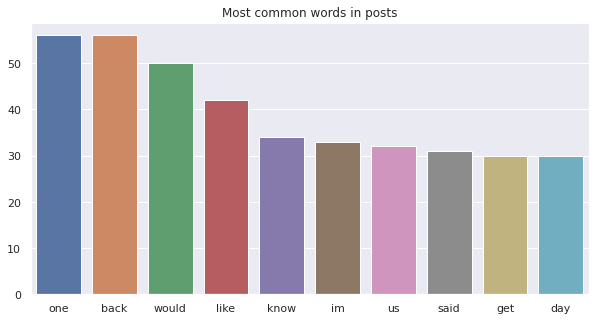

/home/pelle/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


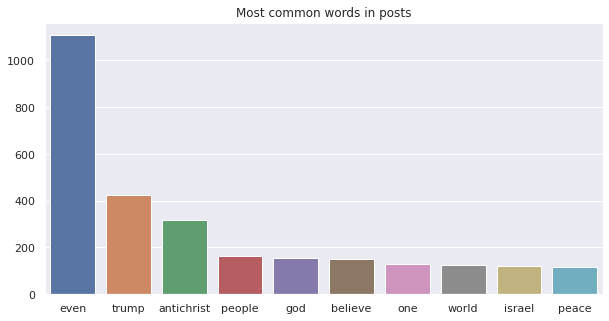

/home/pelle/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


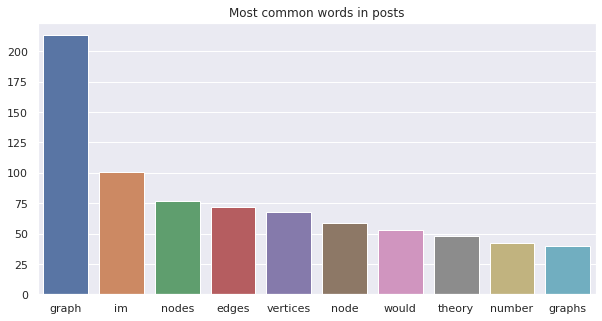

/home/pelle/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


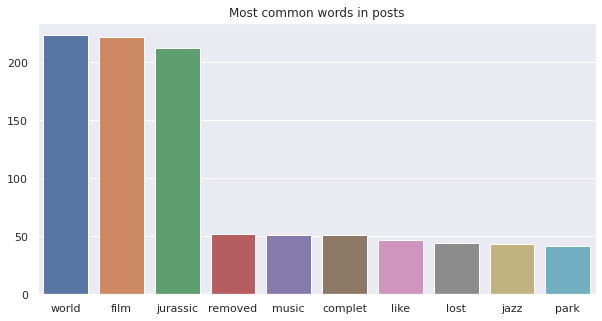

/home/pelle/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


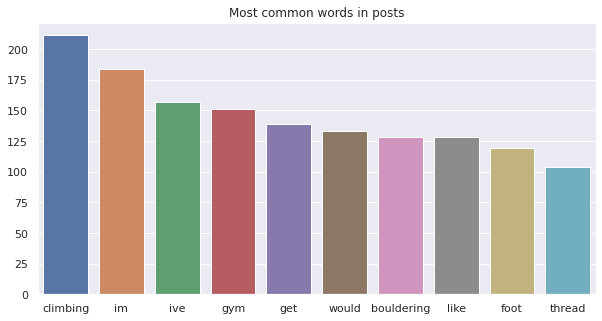

/home/pelle/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


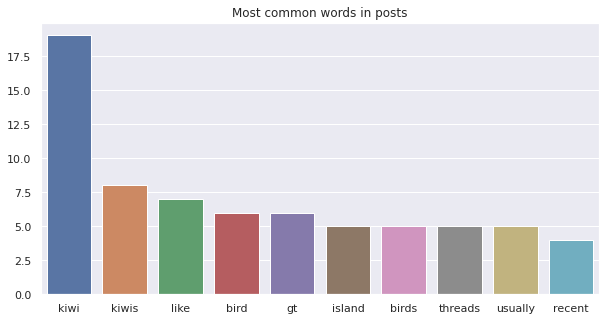

In [44]:
# most said words
from collections import Counter
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string

stop_words = set(stopwords.words('english'))

def get_most_common_words(df, n=10):
    words = []
    for text in df['text']:
        if isinstance(text, str):
            text = text.lower()
            text = text.translate(str.maketrans('', '', string.punctuation))
            text = text.translate(str.maketrans('', '', string.digits))
            text = text.translate(str.maketrans('', '', '“'))
            text = text.translate(str.maketrans('', '', '”'))
            text = text.translate(str.maketrans('', '', '’'))
            word_tokens = word_tokenize(text)
            words.extend(word_tokens)
        words = [w for w in words if not w in stop_words]
        word_count = Counter(words)
    return word_count.most_common(n)
    
# get_most_common_words(df_post_dict['Trump666'])

# plot most common words
def plot_most_common_words(df, n=10):
    word_count = get_most_common_words(df, n)
    words = [w[0] for w in word_count]
    counts = [w[1] for w in word_count]
    plt.figure(figsize=(10,5))
    sns.barplot(words, counts)
    plt.title('Most common words in posts')
    plt.show()

for subreddit in subreddits:
    plot_most_common_words(df_post_dict[subreddit], 10)

# Sentiment

In [10]:
from nltk.sentiment import SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

In [157]:
print(sia.polarity_scores('I love this'))
print(sia.polarity_scores('Precisely half of them do!'))

{'neg': 0.0, 'neu': 0.192, 'pos': 0.808, 'compound': 0.6369}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}


In [21]:
df_comment_dict[subreddit]

,author,text,created_utc,id,parent_id,score,subreddit,created,date
0,bc87,CGP grey had a video on this topic.\n\nhttps:/...,1426303289,cpeda3n,t3_2xx8vt,2,GraphTheory,1.426296e+09,2015-03-14 01:21:29
1,drewshaver,Thanks for the link! I've come to understand o...,1427547124,cptho60,t1_cpeda3n,1,GraphTheory,1.427540e+09,2015-03-28 10:52:04
2,[deleted],[deleted],1428005062,cpz7yf5,t3_2s1j9p,1,GraphTheory,1.427998e+09,2015-04-02 18:04:22
3,bc87,"Sorry but, the google link is no longer availa...",1432548245,crk5kbb,t3_2xx8vt,1,GraphTheory,1.432541e+09,2015-05-25 08:04:05
4,SecretStatus123,Summer holidays... Will do cheers for your help,1436447918,csxcx2y,t1_csxcnzv,2,GraphTheory,1.436441e+09,2015-07-09 11:18:38
...,...,...,...,...,...,...,...,...,...
298,PurgatioBC,"As far as I know, using [union-find data struc...",1565962326,ex242db,t3_cr5fvi,1,GraphTheory,1.565955e+09,2019-08-16 11:32:06
299,p_pistol,Precisely half of them do!,1567334594,eyqaow2,t3_cqjik3,1,GraphTheory,1.567327e+09,2019-09-01 08:43:14
300,HKei,If you're using that logic you might as well s...,1569139535,f12fd3u,t1_f11zx4n,1,GraphTheory,1.569132e+09,2019-09-22 06:05:35
301,bc87,"He's just saying that implementation-wise, the...",1569132893,f11zx4n,t1_eu7422d,1,GraphTheory,1.569126e+09,2019-09-22 04:14:53


In [133]:
def get_sentiment(text):
    if type(text) == str:
        com = sia.polarity_scores(text)['compound']
        return com
    else:
        return np.nan


for subreddit in tqdm(subreddits):
    df_post_dict[subreddit]['title_sentiment'] = df_post_dict[subreddit]['title'].apply(lambda x: get_sentiment(x))
    df_post_dict[subreddit]['text_sentiment'] = df_post_dict[subreddit]['text'].apply(lambda x: get_sentiment(x))
    df_comment_dict[subreddit]['sentiment'] = df_comment_dict[subreddit]['body'].apply(lambda x: get_sentiment(x))

100%|██████████| 6/6 [00:13<00:00,  2.30s/it]


In [134]:
text=df_post_dict[sub].loc[df_post_dict[sub]['title_sentiment']==0]
text.head()

,author,date,domain,id,n_comments,score,text,title,url,date_n,title_sentiment,text_sentiment
1,How_art_thou_fallen_,2020-03-17 22:26:33,cnn.com,fkefs0,0,1,NaN,"Ex-Trump envoy: For Palestinians and Israelis,...",https://www.cnn.com/2020/03/07/opinions/trump-...,1.584477e+09,0.0,NaN
2,TheBusRustler,2020-03-17 21:45:21,self.Trump666,fkdrb8,1,1,Sure smells like schizophrenia in here lol,Hmm,https://www.reddit.com/r/Trump666/comments/fkd...,1.584474e+09,0.0,0.7650
3,_rwofficial,2020-03-17 07:00:08,self.Trump666,fk0t1w,14,1,Why? The Antichrist is to be loved my many. Tr...,I Don't Think He Is,https://www.reddit.com/r/Trump666/comments/fk0...,1.584421e+09,0.0,0.7184
4,How_art_thou_fallen_,2020-03-17 00:53:01,youtu.be,fjw2b4,0,1,NaN,Compilation of Trump boasting (Revelation 13:5),https://youtu.be/7XERwP5YE6w,1.584399e+09,0.0,NaN
5,How_art_thou_fallen_,2020-03-16 23:33:07,youtu.be,fjuu9u,0,1,NaN,"Trump reads ""The Snake"" poem",https://youtu.be/qSrOXvoNLwg,1.584394e+09,0.0,NaN


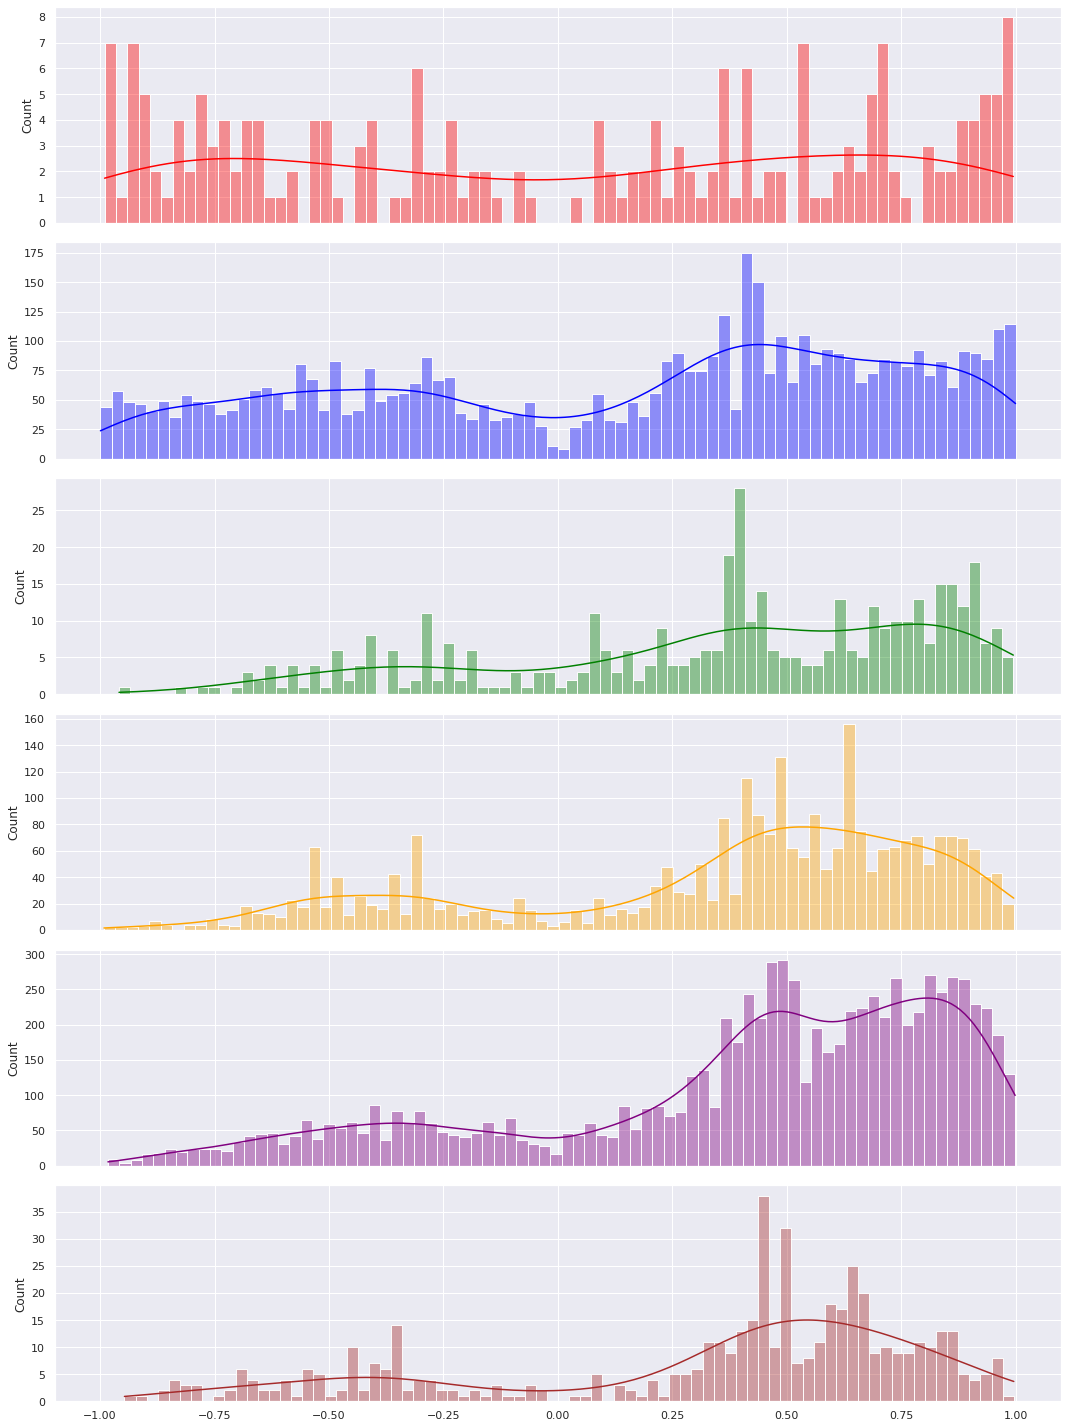

In [155]:
fig, ax = plt.subplots(len(subreddits), 1, figsize=(15, 20), sharex=True)

# color list for each subreddit
colors = ['red', 'blue', 'green', 'orange', 'purple', 'brown', 'pink', 'gray', 'olive', 'cyan']

for i,sub in enumerate(subreddits):

    sentiments=pd.concat([df_post_dict[sub]['title_sentiment'].dropna(),df_comment_dict[sub]['sentiment'].dropna(),df_post_dict[sub]['text_sentiment'].dropna()])
    # drop zero sentiment
    sentiments=sentiments[sentiments!=0]
    sns.histplot(sentiments, bins=80,kde=True,alpha=0.4, ax=ax[i],color=colors[i])

plt.tight_layout()
plt.show()